<a href="https://colab.research.google.com/github/mahdibaghbanzadeh/NLP/blob/main/notebooks/word_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
# https://radimrehurek.com/gensim/models/word2vec.html
# https://analyticsindiamag.com/word2vec-vs-glove-a-comparative-guide-to-word-embedding-techniques/

https://medium.com/intelligentmachines/word-embedding-and-one-hot-encoding-ad17b4bbe111

<h3> Agenda </h3>

*   Use Pretrained Word Vectors
*   Use word vecotrs as feature for classification









In [1]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [5]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [6]:
gensim.__version__

'4.3.1'

In [7]:
np.random.seed(42)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Use Pretrained Word Vectors

In [9]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [11]:
# wv = api.load('glove-twitter-50')

In [12]:
# type(wv)

In [17]:
wv = api.load('glove-wiki-gigaword-100')
wv.save('/content/drive/MyDrive/nlp/glove-wiki-gigaword-100.kv')

# from gensim.models import KeyedVectors
# wv = KeyedVectors.load('/content/drive/MyDrive/nlp/glove-wiki-gigaword-100.kv')

In [18]:
wv['apple']

array([-0.5985   , -0.46321  ,  0.13001  , -0.019576 ,  0.4603   ,
       -0.3018   ,  0.8977   , -0.65634  ,  0.66858  , -0.49164  ,
        0.037557 , -0.050889 ,  0.6451   , -0.53882  , -0.3765   ,
       -0.04312  ,  0.51384  ,  0.17783  ,  0.28596  ,  0.92063  ,
       -0.49349  , -0.48583  ,  0.61321  ,  0.78211  ,  0.19254  ,
        0.91228  , -0.055596 , -0.12512  , -0.65688  ,  0.068557 ,
        0.55629  ,  1.611    , -0.0073642, -0.48879  ,  0.45493  ,
        0.96105  , -0.063369 ,  0.17432  ,  0.9814   , -1.3125   ,
       -0.15801  , -0.54301  , -0.13888  , -0.26146  , -0.3691   ,
        0.26844  , -0.24375  , -0.19484  ,  0.62583  , -0.7377   ,
        0.38351  , -0.75004  , -0.39053  ,  0.091498 , -0.36591  ,
       -1.4715   , -0.45228  ,  0.2256   ,  1.1412   , -0.38526  ,
       -0.06716  ,  0.57288  , -0.39191  ,  0.31302  , -0.29235  ,
       -0.96157  ,  0.15154  , -0.21659  ,  0.25103  ,  0.096967 ,
        0.2843   ,  1.4296   , -0.50565  , -0.51374  , -0.4721

In [19]:
len(wv['apple'])

100

In [20]:
wv.similarity("apple", "mango")

0.5782645

In [21]:
wv.similarity("apple", "car")

0.2709558

In [22]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.67
'car'	'bicycle'	0.69
'car'	'airplane'	0.65
'car'	'cereal'	0.12
'car'	'communism'	0.04


In [23]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('suv', 0.8626778721809387), ('truck', 0.8475819826126099), ('vehicle', 0.8358194231987), ('jeep', 0.791013777256012), ('cars', 0.7910056114196777)]


In [24]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


#### Semantic regularities captured in word embeddings

In [25]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473)]

In [26]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('father', 0.8199653625488281),
 ('mother', 0.8136025071144104),
 ('man', 0.813335657119751)]

In [27]:
words = ["chocolate", "guitar", "mountain", "book", "lamp", "phone", "ocean", "rain", "pizza", "chair", "cat", "dog", "castle", "tree", "tulip", "sun", "moon", "star", "cloud", "sunset"]

In [28]:
# https://deepai.org/dataset/text8

In [29]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 2.3589442 , -3.0533752 ],
       [ 1.0086352 ,  3.3049228 ],
       [-2.1341066 , -1.2044495 ],
       [ 0.91569024,  1.0109892 ],
       [ 0.6402007 ,  1.5372461 ],
       [ 1.3534156 ,  1.7494895 ],
       [-1.9923712 , -0.07018996],
       [-2.8375711 , -0.51906705],
       [ 2.9158916 , -1.8696182 ],
       [ 0.9658797 ,  2.8734856 ],
       [ 1.8143445 , -0.6039073 ],
       [ 2.327697  , -1.0205938 ],
       [-0.84067327,  1.4411728 ],
       [-0.08388456, -0.60092354],
       [ 1.65476   , -0.8710394 ],
       [-2.6462784 , -0.6821448 ],
       [-1.7364702 , -0.9304212 ],
       [-0.62989867,  0.14425842],
       [-1.900818  , -0.12729722],
       [-1.1533855 , -0.5085382 ]], dtype=float32)

### Visualizing these word vectors

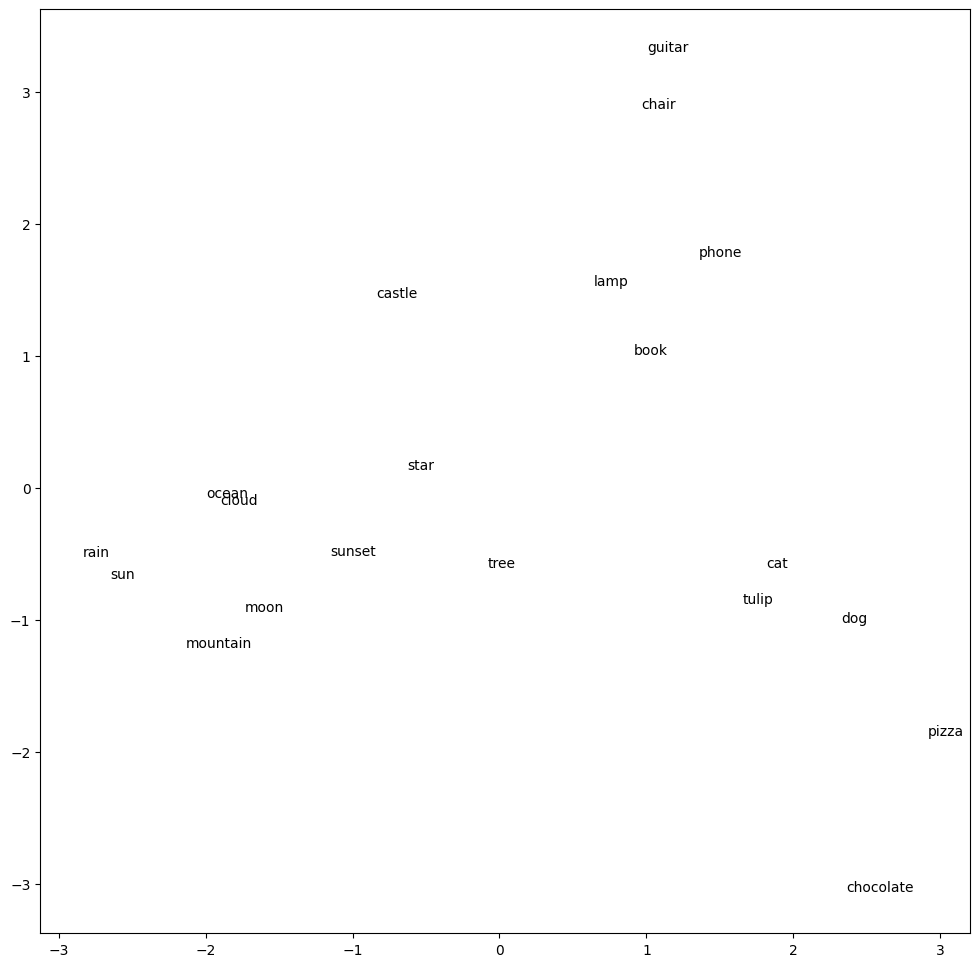

In [30]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1], marker='')
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
data = pd.read_csv("/content/drive/MyDrive/data/toxic_comments/train.csv")
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [32]:
data.shape

(159571, 8)

In [33]:
df_sam = data.sample(frac=0.3)
df_sam.shape

(47871, 8)

In [37]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [38]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]


    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [39]:
sent_vec("I am happy")

array([-0.19941375,  0.32042401, -0.0486666 ,  0.17522124, -0.24844876,
        0.039935  ,  0.40979624,  0.2883075 , -0.47282126,  0.325015  ,
        0.57038497, -0.2499273 , -0.12942813,  0.15432072,  0.19267087,
       -0.21837663, -0.1241075 ,  0.05396824, -0.103167  ,  0.04101025,
        0.61321001,  0.03681687,  0.0156525 ,  0.51534349,  0.21021874,
        0.24062374,  0.25922624, -0.14654625, -0.08736501, -0.29604   ,
        0.22764749,  0.64905499,  0.0098485 ,  0.0520975 ,  0.30462751,
        0.11103188,  0.47936098,  0.27186625,  0.30125001,  0.22453438,
        0.25627672, -0.439231  ,  0.132318  , -0.2535255 ,  0.00905901,
        0.10042615, -0.2859025 ,  0.24892417, -0.05743551, -0.31715501,
       -0.27640876, -0.04955175,  0.38040125,  0.21226023, -0.40827   ,
       -1.82308748, -0.079976  ,  0.24433501,  1.14205879,  0.20065749,
       -0.24946375, -0.116187  , -0.57925375, -0.21282655,  0.80516373,
        0.35851925,  0.39172999,  0.26376   ,  0.56866998,  0.23

In [40]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'were', 'her', 'well', 'upon', 'moreover', 'name', 'rather', 'put', 'fifty', 'themselves', 'made', 'several', 'these', 'keep', 'six', 'from', 'its', 'below', 'by', 'thence', 'others', 'am', 'various', 'during', 'you', 'ours', 'was', 'whatever', 'hers', 'after', 'besides', 'else', 'behind', 'thus', 'us', 'hence', 'on', 'within', 'must', 'may', 'himself', 'more', 'fifteen', 'their', 'being', 'everything', 'everywhere', 'she', 'could', 'much', 'whereupon', '’re', 'go', 'seem', 'ever', 'if', 'serious', 'side', '‘ve', 'and', 'nevertheless', 'herein', 'ourselves', 'so', 'nothing', 'back', 'it', 'myself', 'sixty', 'only', 'namely', 'what', 'do', 'per', 'get', 'ten', 'something', 'because', 'becoming', 'thereby', 'third', 'between', 'formerly', 'under', 'where', 'about', 'whence', 'via', 'four', 'those', 'few', 'forty', 'itself', 'say', "n't", 'our', 'eight', 'wherein', 'any', 'although', 'too', 'regarding', 'for', 'did', 'please', 'same', 'when', 'sometimes', 'which', 'somehow', 'three', 'le

In [41]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [43]:
df_sam['tokens'] = df_sam['comment_text'].apply(spacy_tokenizer)

In [44]:
df_sam.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
119105,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0,"[geez, forgetful, discuss, marx, anarchist, i...."
131631,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0,"[carioca, rfa, thank, support, request, admins..."
125326,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0,"[birthday, worry, ;), enjoy, ur, day|talk|e]"
111256,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0,"[pseudoscience, category, assume, article, pse..."
83590,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0,"[phrase, exist, provide, search, engine, menti..."


In [45]:
df_sam['vec'] = df_sam['tokens'].apply(sent_vec)

In [46]:
df_sam.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens,vec
119105,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0,"[geez, forgetful, discuss, marx, anarchist, i....","[-0.005740059450125465, 0.3768241311996602, 0...."
131631,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0,"[carioca, rfa, thank, support, request, admins...","[-0.0638925238745287, 0.009364937199279666, 0...."
125326,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0,"[birthday, worry, ;), enjoy, ur, day|talk|e]","[-0.3007287550717592, -0.1302991658449173, 0.4..."
111256,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0,"[pseudoscience, category, assume, article, pse...","[-0.0823730977492467, 0.3403078996606411, 0.23..."
83590,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0,"[phrase, exist, provide, search, engine, menti...","[-0.41295189244879615, 0.3399627786129713, 0.1..."


In [47]:
X = df_sam['vec'].to_list()
y = df_sam['toxic'].to_list()

In [48]:
X[0]

array([-5.74005945e-03,  3.76824131e-01,  9.15734613e-02, -1.49786961e-01,
       -3.69248120e-01,  2.46838079e-01, -1.05436588e-01, -8.40971546e-02,
        1.15212340e-01,  6.29731172e-02, -1.38637808e-01,  4.94301931e-02,
        2.68337957e-01,  1.69171098e-01,  1.22427535e-01,  9.08728567e-02,
        1.81353966e-01, -2.94982814e-05, -1.84371767e-01,  7.85165843e-02,
        2.30074461e-01,  1.85888188e-01, -1.84396532e-02, -2.00361342e-01,
        6.01000138e-03,  8.21438874e-02, -1.36505230e-01, -4.75360076e-01,
        4.78485444e-02,  1.15257500e-01, -7.77576511e-02,  3.83515033e-01,
        5.06278014e-02, -2.80263953e-01, -1.14702680e-02,  1.98921306e-01,
        5.41030779e-02,  9.78730189e-04,  9.51204869e-02, -3.01040149e-01,
       -2.19832847e-01, -2.64070375e-02,  6.37286166e-02, -3.07078157e-01,
       -1.62492828e-01, -7.95043099e-02, -2.33848095e-02, -6.33761165e-02,
       -1.76192565e-01, -2.45077313e-01,  5.79515956e-02,  7.98183874e-02,
        1.13145743e-02,  

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [51]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [52]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9389033942558747
Logistic Regression Precision: 0.7939609236234458
Logistic Regression Recall: 0.48799126637554585
